In [282]:
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
import urllib.request as REQ

import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (8, 6)

In [2]:
curl = 'http://ncov.mohw.go.kr/bdBoardList_Real.do?brdId=1&brdGubun=13&ncvContSeq=&contSeq=&board_id=&gubun='
response = REQ.urlopen(curl)
soup = BeautifulSoup(response, 'html5lib') 
soup

<!DOCTYPE html>
<html lang="ko"><head>
<title>코로나바이러스감염증-19 &gt; 발생동향 &gt; 시도별 발생동향
</title>




<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1, user-scalable=yes" name="viewport"/>
<meta content="보건복지부, 코로나바이러스감염증-19(COVID-19), 질병관리청" name="author"/>     
<meta content="코로나바이러스감염증-19(COVID-19), 코로나바이러스감염증-19, 코로나바이러스, 보건복지부" name="keywords"/>	
<meta content="보건복지부" name="copyright"/>

<meta content="http://ncov.mohw.go.kr/" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="코로나바이러스감염증-19(COVID-19)" property="og:site_name"/>
<meta content="ko" property="og:locale"/>
<meta content="코로나바이러스감염증-19(COVID-19)" property="og:title"/>
<meta content="http://ncov.mohw.go.kr/static/image/header/homeimg_new.jpg" property="og:image"/> 
    
<link href="/static/image/header/ROK.png;jsessionid=PbqtqJtHivJbDELLF8iLmjl7nCPD4z1Hj652Sd95CHqdpgKYV20OhrhyHhSYhx1r.mohwwas2_servlet_engine40" rel="i

In [39]:
ulTag = soup.select('table',{'class':'num midsize'})
ulTag

[<table class="num midsize">
 								<caption><span class="hdn">코로나-19 시도별 발생 현황표 - 시도명, 전일대비 확진환자 증감(합계, 해외유입, 국내발생), 확진환자수(명) (확진환자, 격리중, 격리해제, 사망자수, 발생률) 으로 구성</span></caption>
 								<colgroup>
 									<col style="width:12%;"/>
 									<col style="width:9.5%;"/>
 									<col style="width:9.5%;"/>
 									<col style="width:9.5%;"/>
 									<col style="width:14%;"/>
 									<col style="width:11%;"/>
 									<col style="width:11%;"/>
 									<col style="width:11%;"/>
 									<col style="width:12.5%;"/>
 								</colgroup>
 								<thead>
 									<tr>
 										<th rowspan="2" scope="col">시도명</th>
 										<th colspan="3" id="status_level" scope="col">전일대비<br/>확진환자 증감</th>
 										<th colspan="5" id="status_con">확진환자 (명)</th>
 									</tr>
 									<tr>
 										<th id="l_type1" scope="col">합계</th>
 										<th id="l_type2" scope="col">국내<br/>발생</th>
 										<th id="l_type3" scope="col">해외<br/>유입</th>
 										<th id="s_type1" scope="col">확진<b

In [176]:
name=[]


for l in ulTag:
    for trs in l.select('tr'):
        name.append(trs.select_one('th').string)
name

['시도명',
 '합계',
 '합계',
 '서울',
 '부산',
 '대구',
 '인천',
 '광주',
 '대전',
 '울산',
 '세종',
 '경기',
 '강원',
 '충북',
 '충남',
 '전북',
 '전남',
 '경북',
 '경남',
 '제주',
 '검역']

In [187]:
arr = np.array(name)
arr

array(['시도명', '합계', '합계', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종',
       '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주', '검역'],
      dtype='<U3')

In [191]:
arr[2:]

array(['합계', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원',
       '충북', '충남', '전북', '전남', '경북', '경남', '제주', '검역'], dtype='<U3')

In [164]:
aa = []

for l in ulTag:
    for trs in l.select('tr'):
            tds4 = trs.select('td:nth-of-type(4)')
            for a in tds4:
                aa.append(a.string)
aa

['59,773',
 '18,638',
 '1,794',
 '7,768',
 '2,780',
 '1,073',
 '838',
 '638',
 '149',
 '14,226',
 '1,171',
 '1,141',
 '1,635',
 '825',
 '555',
 '2,401',
 '1,303',
 '407',
 '2,431']

In [165]:
bb = []

for l in ulTag:
    for trs in l.select('tr'):
            tds5 = trs.select('td:nth-of-type(5)')
            for b in tds5:
                bb.append(b.string)
bb

['17,459',
 '8,341',
 '448',
 '331',
 '715',
 '234',
 '161',
 '186',
 '21',
 '3,617',
 '327',
 '531',
 '470',
 '207',
 '86',
 '498',
 '322',
 '215',
 '749']

In [170]:
cc = []

for l in ulTag:
    for trs in l.select('tr'):
            tds6 = trs.select('td:nth-of-type(6)')
            for c in tds6:
                cc.append(c.string)
cc

['41,435',
 '10,125',
 '1,300',
 '7,236',
 '2,039',
 '833',
 '670',
 '426',
 '127',
 '10,356',
 '831',
 '587',
 '1,143',
 '607',
 '464',
 '1,842',
 '977',
 '192',
 '1,680']

In [167]:
dd = []

for l in ulTag:
    for trs in l.select('tr'):
            tds7 = trs.select('td:nth-of-type(7)')
            for d in tds7:
                dd.append(d.string)
dd

['879',
 '172',
 '46',
 '201',
 '26',
 '6',
 '7',
 '26',
 '1',
 '253',
 '13',
 '23',
 '22',
 '11',
 '5',
 '61',
 '4',
 '0',
 '2']

In [168]:
ee = []

for l in ulTag:
    for trs in l.select('tr'):
            tds8 = trs.select('td:nth-of-type(8)')
            for e in tds8:
                ee.append(e.string)
ee

['115.29',
 '191.48',
 '52.58',
 '318.82',
 '94.04',
 '73.66',
 '56.85',
 '55.62',
 '43.53',
 '107.36',
 '76.01',
 '71.34',
 '77.03',
 '45.40',
 '29.76',
 '90.18',
 '38.76',
 '60.68',
 '-']

AttributeError: 'list' object has no attribute 'size'

In [223]:
koreaDF = pd.DataFrame()
koreaDF

""


In [224]:
koreaDF['확진환자'] = aa
koreaDF['격리중 '] = bb
koreaDF['격리해제  '] = cc
koreaDF['사망자    '] = dd
koreaDF['발생률 '] = ee
koreaDF

,확진환자,격리중,격리해제,사망자,발생률
0,"59,773","17,459","41,435",879,115.29
1,"18,638","8,341","10,125",172,191.48
2,"1,794",448,"1,300",46,52.58
3,"7,768",331,"7,236",201,318.82
4,"2,780",715,"2,039",26,94.04
5,"1,073",234,833,6,73.66
6,838,161,670,7,56.85
7,638,186,426,26,55.62
8,149,21,127,1,43.53
9,"14,226","3,617","10,356",253,107.36


In [225]:
koreaDF['시도명'] = arr[2:]
koreaDF

,확진환자,격리중,격리해제,사망자,발생률,시도명
0,"59,773","17,459","41,435",879,115.29,합계
1,"18,638","8,341","10,125",172,191.48,서울
2,"1,794",448,"1,300",46,52.58,부산
3,"7,768",331,"7,236",201,318.82,대구
4,"2,780",715,"2,039",26,94.04,인천
5,"1,073",234,833,6,73.66,광주
6,838,161,670,7,56.85,대전
7,638,186,426,26,55.62,울산
8,149,21,127,1,43.53,세종
9,"14,226","3,617","10,356",253,107.36,경기


In [226]:
koreaDF.drop(0, inplace=True)

In [227]:
koreaDF.drop(18, inplace=True)

In [228]:
koreaDF

,확진환자,격리중,격리해제,사망자,발생률,시도명
1,"18,638","8,341","10,125",172,191.48,서울
2,"1,794",448,"1,300",46,52.58,부산
3,"7,768",331,"7,236",201,318.82,대구
4,"2,780",715,"2,039",26,94.04,인천
5,"1,073",234,833,6,73.66,광주
6,838,161,670,7,56.85,대전
7,638,186,426,26,55.62,울산
8,149,21,127,1,43.53,세종
9,"14,226","3,617","10,356",253,107.36,경기
10,"1,171",327,831,13,76.01,강원


In [229]:
koreaDF.to_csv('korea_corona.csv')

In [230]:
koreaDF.set_index('시도명', inplace=True)
koreaDF

,확진환자,격리중,격리해제,사망자,발생률
시도명,,,,,
서울,"18,638","8,341","10,125",172,191.48
부산,"1,794",448,"1,300",46,52.58
대구,"7,768",331,"7,236",201,318.82
인천,"2,780",715,"2,039",26,94.04
광주,"1,073",234,833,6,73.66
대전,838,161,670,7,56.85
울산,638,186,426,26,55.62
세종,149,21,127,1,43.53
경기,"14,226","3,617","10,356",253,107.36


# 통계분석

In [234]:
koreaDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 서울 to 제주
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   확진환자     17 non-null     object
 1   격리중      17 non-null     object
 2   격리해제     17 non-null     object
 3   사망자      17 non-null     object
 4   발생률      17 non-null     object
dtypes: object(5)
memory usage: 816.0+ bytes


In [254]:
koreaDF['확진환자'] = koreaDF['확진환자'].apply(lambda x: x.replace(',', ''))
koreaDF

,확진환자,격리중,격리해제,사망자,발생률
시도명,,,,,
서울,18638,"8,341","10,125",172,191.48
부산,1794,448,"1,300",46,52.58
대구,7768,331,"7,236",201,318.82
인천,2780,715,"2,039",26,94.04
광주,1073,234,833,6,73.66
대전,838,161,670,7,56.85
울산,638,186,426,26,55.62
세종,149,21,127,1,43.53
경기,14226,"3,617","10,356",253,107.36


In [261]:
koreaDF.columns = ['확진환자', '격리중', '격리해제', '사망자', '발생률']

In [262]:
koreaDF

,확진환자,격리중,격리해제,사망자,발생률
시도명,,,,,
서울,18638,"8,341","10,125",172,191.48
부산,1794,448,"1,300",46,52.58
대구,7768,331,"7,236",201,318.82
인천,2780,715,"2,039",26,94.04
광주,1073,234,833,6,73.66
대전,838,161,670,7,56.85
울산,638,186,426,26,55.62
세종,149,21,127,1,43.53
경기,14226,"3,617","10,356",253,107.36


In [265]:
def remove_comma(x):
     return x.replace(',', '')

koreaDF['확진환자'] = koreaDF['확진환자'].apply(remove_comma)
koreaDF['격리중'] = koreaDF['격리중'].apply(remove_comma)
koreaDF['격리해제'] = koreaDF['격리해제'].apply(remove_comma)

In [266]:
koreaDF

,확진환자,격리중,격리해제,사망자,발생률
시도명,,,,,
서울,18638,8341,10125,172,191.48
부산,1794,448,1300,46,52.58
대구,7768,331,7236,201,318.82
인천,2780,715,2039,26,94.04
광주,1073,234,833,6,73.66
대전,838,161,670,7,56.85
울산,638,186,426,26,55.62
세종,149,21,127,1,43.53
경기,14226,3617,10356,253,107.36


In [269]:
koreaDF['확진환자'] = koreaDF['확진환자'].astype(int)
koreaDF['격리중'] = koreaDF['격리중'].astype(int)
koreaDF['격리해제'] = koreaDF['격리해제'].astype(int)
koreaDF['사망자'] = koreaDF['사망자'].astype(int)
koreaDF['발생률'] = koreaDF['발생률'].astype(float)
koreaDF

,확진환자,격리중,격리해제,사망자,발생률
시도명,,,,,
서울,18638,8341,10125,172,191.48
부산,1794,448,1300,46,52.58
대구,7768,331,7236,201,318.82
인천,2780,715,2039,26,94.04
광주,1073,234,833,6,73.66
대전,838,161,670,7,56.85
울산,638,186,426,26,55.62
세종,149,21,127,1,43.53
경기,14226,3617,10356,253,107.36


In [270]:
koreaDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 서울 to 제주
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   확진환자    17 non-null     int32  
 1   격리중     17 non-null     int32  
 2   격리해제    17 non-null     int32  
 3   사망자     17 non-null     int32  
 4   발생률     17 non-null     float64
dtypes: float64(1), int32(4)
memory usage: 544.0+ bytes


In [271]:
koreaDF.to_csv('korea_corona.csv')

In [272]:
koreaDF

,확진환자,격리중,격리해제,사망자,발생률
시도명,,,,,
서울,18638,8341,10125,172,191.48
부산,1794,448,1300,46,52.58
대구,7768,331,7236,201,318.82
인천,2780,715,2039,26,94.04
광주,1073,234,833,6,73.66
대전,838,161,670,7,56.85
울산,638,186,426,26,55.62
세종,149,21,127,1,43.53
경기,14226,3617,10356,253,107.36


## 국내 시도 발생률 가장 높은 top5

In [275]:
koreaDF.nlargest(5, columns='발생률')

,확진환자,격리중,격리해제,사망자,발생률
시도명,,,,,
대구,7768,331,7236,201,318.82
서울,18638,8341,10125,172,191.48
경기,14226,3617,10356,253,107.36
인천,2780,715,2039,26,94.04
경북,2401,498,1842,61,90.18


## 국내 시도 발생률 가장 낮은 top5

In [278]:
koreaDF.nsmallest(5, columns='발생률')

,확진환자,격리중,격리해제,사망자,발생률
시도명,,,,,
전남,555,86,464,5,29.76
경남,1303,322,977,4,38.76
세종,149,21,127,1,43.53
전북,825,207,607,11,45.40
부산,1794,448,1300,46,52.58


## 국내 시도별 발생률 추이

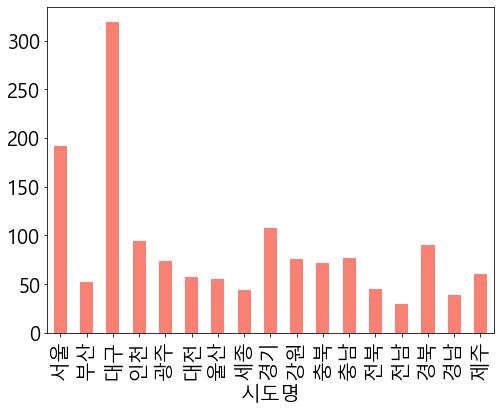

In [285]:
koreaDF['발생률'].plot(kind='bar', color='salmon')
plt.show()